In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub

In [ ]:
inception_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", output_shape=[1001])
])
inception_model.build([None, 299, 299, 3])  # Batch input shape.

In [ ]:
!wget https://images.newscientist.com/wp-content/uploads/2020/09/22145012/big-frog-eyes.jpg

--2021-02-22 20:27:39--  https://images.newscientist.com/wp-content/uploads/2020/09/22145012/big-frog-eyes.jpg
Resolving images.newscientist.com (images.newscientist.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to images.newscientist.com (images.newscientist.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54089 (53K) [image/jpeg]
Saving to: ‘big-frog-eyes.jpg.1’

big-frog-eyes.jpg.1 100%[===================>]  52.82K  --.-KB/s    in 0.007s  

2021-02-22 20:27:39 (7.73 MB/s) - ‘big-frog-eyes.jpg.1’ saved [54089/54089]



In [ ]:
image_d = tf.keras.preprocessing.image.load_img('big-frog-eyes.jpg', target_size=(229, 229))

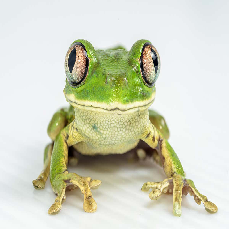

In [ ]:
image_d

In [ ]:
image_array = tf.keras.preprocessing.image.img_to_array(image_d) / 225.0

In [ ]:
image_array.shape

(229, 229, 3)

In [ ]:
image_array1 = image_array.reshape(1,229,229,3)

In [ ]:
image_array2 = image_array[tf.newaxis, ...]

In [ ]:
image_array1.shape

(1, 229, 229, 3)

In [ ]:
image_array2.shape

(1, 229, 229, 3)

In [ ]:
output = inception_model(image_array2)

In [ ]:
output.shape

TensorShape([1, 1001])

In [ ]:
np.argmax(output.numpy())

32

In [ ]:
import requests
classes = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').text.split('\n')
classes[np.argmax(output.numpy())]

'tree frog'